In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

# Порядок

## Анализ набора данных, типов признаков и характеристик признаков

## Генерация дополнительных признаков

## Устранение пропусков в данных

### Загрузка данных

In [5]:
data = pd.read_csv("data/house_prices_train.csv", sep=",")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data.shape

(1460, 81)

In [8]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Удаление пропущенных значений

**Допущение:** пропуски распределены случайным образом.

**Когда рекомендуется использовать?**

- Если пропущенных данных слишком много и возникает опасность нарушить распределение исходных данных при заполнении пропусков. Рекомендуется удалять признак (колонку) целиком.
- Если датасет большой и пропущенных данных относительно немного, то рекомендуется удалять строки, содержащие пропуски в данных.
- Под "немного" в идеальном случае понимается 5% от выборки.

**Преимущества:**

- Простота реализации.
- При случайном распределении пропусков сохраняются параметры распределения исходных данных.

**Недостатки:**

- Может быть удален большой фрагмент данных при неудачном распределении пропусков в нескольких столбцах.
- Если пропуски распределены не случайно, то можно удалить значимые данные.

#### Удаление колонок, содержащих пустые значения

In [15]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1460, 81), (1460, 62))

#### Удаление строк, содержащих пустые значения

In [16]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1460, 81), (0, 81))

#### Удаление может производиться для группы строк или колонок

In [84]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['LotFrontage', 'GarageYrBlt', 'BsmtQual', 'MasVnrArea']

# Удаление пропусков
data_new_group = data[hcols_with_na_temp].dropna()
(data.shape, data_new_group.shape)

((1460, 81), (1097, 4))

### Заполнение всех пропущенных значений нулями

In [17]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


### "Внедрение значений" - импьютация (imputation)

В этом случае данные которые находятся в соседних признаках (колонках) не учитываются при заполнении.

**Заполнение (внедрение) значений или импьютация (imputation)** - это заполнение пропущенных значений их статистическими оценками.

**Для числовых признаков:**

- Заполнение показателями центра распределения.
- Заполнение константой. Полезно в случае "неслучайного" распределения пропусков.
- Заполнение "хвостом распределения".

**Для категориальных признаков:**

- Заполнение наиболее распространенным значением категории (аналогом моды).
- Введение отдельного значения категории для пропущенных значений.

**Для числовых и категориальных признаков:**

- Добавления флага пропусков.
- Заполнение случайным значением признака. Метод обычно применяют на больших выборках. Преимуществом является то, что он сохраняет дисперсию исходной выборки.

#### Заполнение показателями центра распределения и константой для числовых признаков.

В случае нормального распределения математическое ожидание, медиана и мода совпадают:

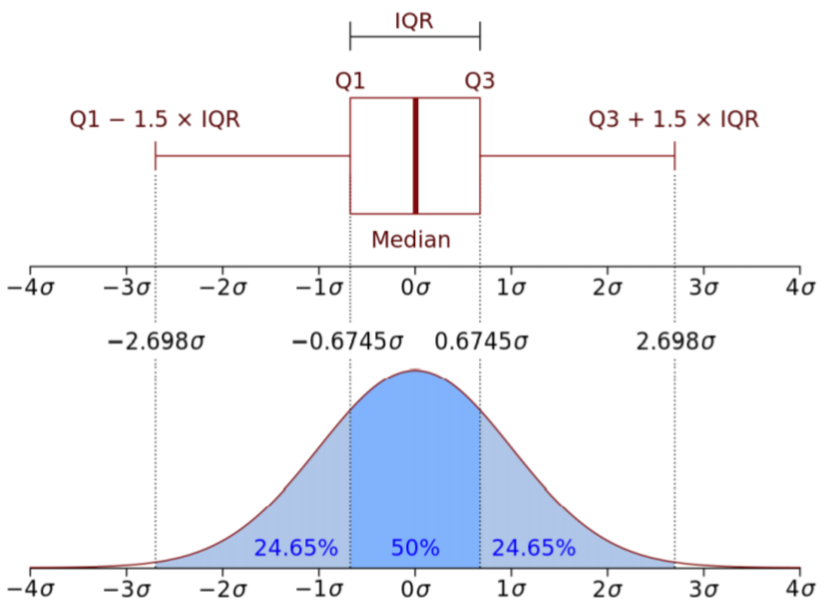

In [92]:
from IPython.display import Image

Image('img/normal_dist.png', width="30%")

Для ассиметричных распределений эти показатели различаются:

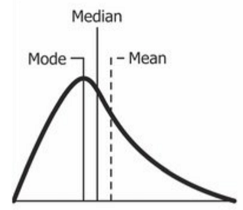

In [91]:
Image('img/center_skewed.png', width='30%')

**Когда рекомендуется использовать?**

- Если пропуски распределены случайным образом.
- В идеальном случае пропусков не более 5% от выборки.

**Какой показатель центра распределения лучше использовать?**

- Если распределение одномодальное, то лучше использовать моду, иначе математическое ожидание или медиану.
- Не существует однозначного предпочтения между математическим ожиданием или медианой. Но медиана более устойчива к выбросам в данных.

Для внедрение) значений может быть использован класс SimpleImputer.

Для фильтрации пропущенных значений может быть использован класс MissingIndicator.

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Пример работы MissingIndicator
# Фильтр для проверки заполнения пустых значений
temp_x1 = np.array([[np.nan, 1, 3], [4, 0, np.nan], [8, 1, 0]])
print('Исходный массив:')
print(temp_x1)
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(temp_x1)
print('Маска пропущенных значений:')
print(temp_x1_transformed)

Исходный массив:
[[nan  1.  3.]
 [ 4.  0. nan]
 [ 8.  1.  0.]]
Маска пропущенных значений:
[[ True False]
 [False  True]
 [False False]]


In [95]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [103]:
all_data, filled_data, missed_data = impute_column(data, 'MasVnrArea', 'mean')
all_data

array([196.,   0., 162., ...,   0.,   0.,   0.])

In [104]:
filled_data

array([103.68526171, 103.68526171, 103.68526171, 103.68526171,
       103.68526171, 103.68526171, 103.68526171, 103.68526171])

In [105]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [106]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения

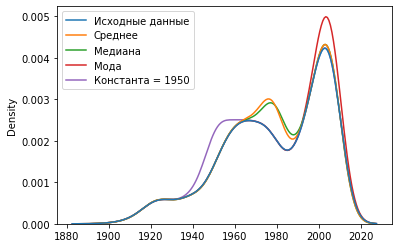

In [107]:
research_impute_numeric_column(data, 'GarageYrBlt', 1950)

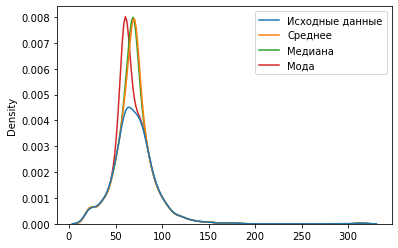

In [108]:
research_impute_numeric_column(data, 'LotFrontage')

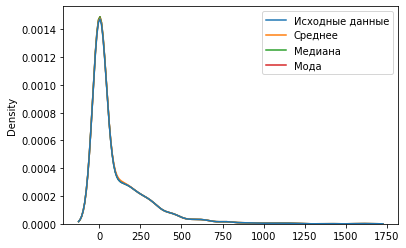

In [109]:
research_impute_numeric_column(data, 'MasVnrArea')

#### Заполнение "хвостом распределения" для числовых признаков

**Допущение:** пропуски распределены НЕ случайным образом. Мы хотим выделить пропущенные значения из остальных значений.

**Преимущества:**

- Простота реализации.
- Выделяет пропущенные значения из остальных значений.

**Недостатки:**

- Нарушение параметров исходного распределения.
- Поскольку значения на краю распределения фактически являются аномалиями (выбросами), то данный подход может пересекаться с алгоритмами поиска аномалий.

**Как вычислить "хвост распределения"?**

Если распределение данных признака $f$ напоминает нормальное:

$$
extreme\_value = mean(f)+3⋅std(f)
$$
Для ассиметричного распределения:
$$
IQR = Q3−Q1
$$
$IQR$ − interquartile range.
$$
extreme\_value=Q3+K⋅IQR
$$

Значение ***K*** обычно выбирается равным **1,5**. Но для экстремальных выбросов выбирают ***K*** = **3**.

In [111]:
# Похоже на нормальное
LotFrontage_ev = data['LotFrontage'].mean() + 3*data['LotFrontage'].std()
LotFrontage_ev

142.9042136914762

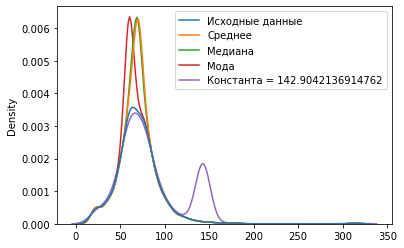

In [112]:
research_impute_numeric_column(data, 'LotFrontage', LotFrontage_ev)

In [114]:
# Ассиметричное
IQR = data['MasVnrArea'].quantile(0.75) - data['MasVnrArea'].quantile(0.25)
MasVnrArea_ev1 = data['MasVnrArea'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, MasVnrArea_ev1))

IQR=166.0, extreme_value=664.0


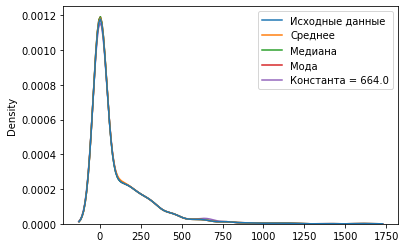

In [115]:
research_impute_numeric_column(data, 'MasVnrArea', MasVnrArea_ev1)

In [116]:
MasVnrArea_ev2 = data['MasVnrArea'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, MasVnrArea_ev2))

IQR=166.0, extreme_value=415.0


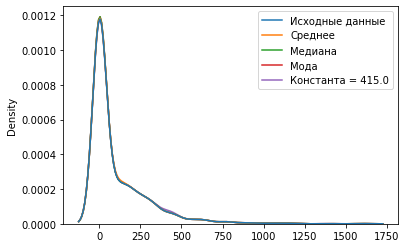

In [118]:
research_impute_numeric_column(data, 'MasVnrArea', MasVnrArea_ev2)

In [119]:
IQR_lf = data['LotFrontage'].quantile(0.75) - data['LotFrontage'].quantile(0.25)
LotFrontage_ev1 = data['LotFrontage'].quantile(0.75) + 1.5*IQR_lf
LotFrontage_ev2 = data['LotFrontage'].quantile(0.75) + 3*IQR_lf

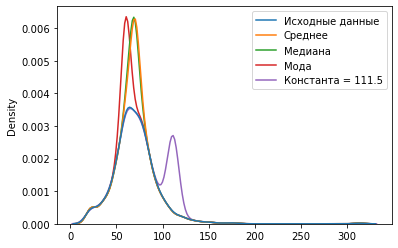

In [120]:
research_impute_numeric_column(data, 'LotFrontage', LotFrontage_ev1)

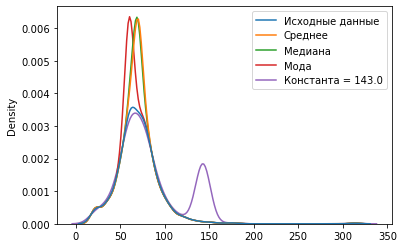

In [121]:
research_impute_numeric_column(data, 'LotFrontage', LotFrontage_ev2)

#### Заполнение наиболее распространенным значением категории для категориальных признаков

**Допущение:** пропуски распределены случайным образом. Заполнение пропусков наиболее распространенным значением категории в наименьшей степени повлияет на исходное распределение.

In [124]:
data_cat_cols = ['GarageType', 'PoolQC', 'Fence']
data_cat_new = data[data_cat_cols].copy()

In [126]:
GarageType_cat_new_temp, _, _ = impute_column(data_cat_new, 'GarageType', 'most_frequent')
PoolQC_cat_new_temp, _, _ = impute_column(data_cat_new, 'PoolQC', 'most_frequent')
Fence_cat_new_temp, _, _ = impute_column(data_cat_new, 'Fence', 'most_frequent')

In [127]:
data_cat_new['GarageType'] = GarageType_cat_new_temp
data_cat_new['PoolQC'] = PoolQC_cat_new_temp
data_cat_new['Fence'] = Fence_cat_new_temp

In [129]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

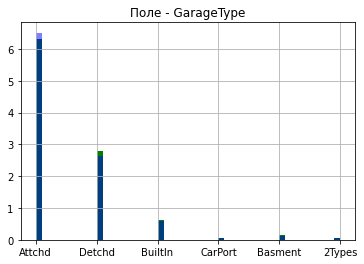

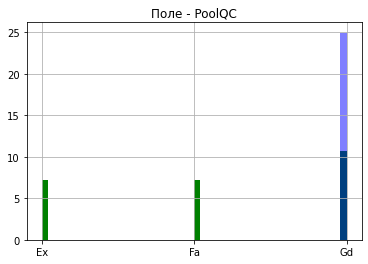

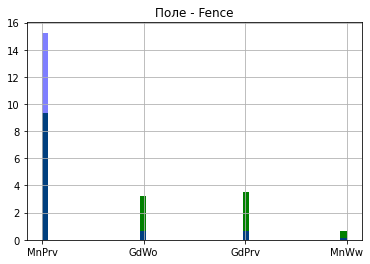

In [130]:
plot_hist_diff(data, data_cat_new, data_cat_cols)

#### Введение отдельного значения категории для пропущенных значений для категориальных признаков

**Основное преимущество подхода** состоит в том, что не дается никаких предположений о распределении пропущенных значений.

In [131]:
data_cat_na = data[data_cat_cols].copy()

In [132]:
GarageType_cat_na_temp, _, _ = impute_column(data_cat_na, 'GarageType', 'constant', fill_value_param='NA')
PoolQC_cat_na_temp, _, _ = impute_column(data_cat_na, 'PoolQC', 'constant', fill_value_param='NA')
Fence_cat_na_temp, _, _ = impute_column(data_cat_na, 'Fence', 'constant', fill_value_param='NA')

In [133]:
data_cat_na['GarageType'] = GarageType_cat_na_temp
data_cat_na['PoolQC'] = PoolQC_cat_na_temp
data_cat_na['Fence'] = Fence_cat_na_temp

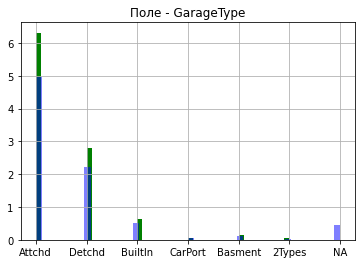

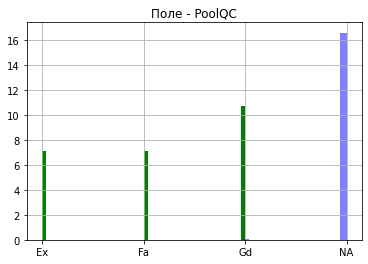

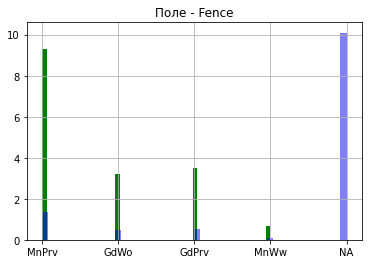

In [135]:
plot_hist_diff(data, data_cat_na, data_cat_cols)

#### Добавления флага пропусков для любых признаков

Для каждой колонки данных вводится дополнительная бинарная колонка, в которой пустым значениям признака соответствует 1.

**Преимущества:**

- Модель получает дополнительную информацию о том, насколько мы уверены в наших данных. Особенно хорошо этот подход работает для деревьев решений и производных моделей.
**Недостатки:**

- Расширяется признаковое пространство.
- Заполнять пропуски для исходных колонок все равно необходимо.
- Флаги для разных колонок могут сильно коррелировать между собой.

In [136]:
data_mis = data[['PoolQC']].copy()
data_mis.head()

,PoolQC
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [137]:
indicator = MissingIndicator()
PoolQC_missing = indicator.fit_transform(data_mis[['PoolQC']])
PoolQC_missing

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [138]:
PoolQC_missing_int = [1 if i==True else 0 for i in PoolQC_missing]
PoolQC_missing_int[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [141]:
data_mis['PoolQC_missing'] = PoolQC_missing_int
data_mis.head()

,PoolQC,PoolQC_missing
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


### Заполнение значений для нескольких признаков

В этом случае данные которые находятся в соседних признаках (колонках) учитываются при заполнении.

Идея состоит в том, что признаки могут зависеть между собой и такие зависимости необходимо использовать при заполнении пропусков.

В этом случае мы решаем отдельную задачу машинного обучения, рассматривая пропущенный признак как целевой (y), а остальные признаки как исходные (X).

Для решения задачи можно использовать различные методы машинного обучения. На практике чаще всего используется **метод ближайших соседей.**

Также проблема состоит в том, что практически все признаки могут содержать пропуски и для их заполнения другие признаки необходимо предварительно импьютировать известными методами. (возникает подобие циклических ссылок).

Для решения этой задачи используется метод **MICE (multivariate Imputation of Chained Equations)**. Существует расширение этого метода **MissForest** в котором используется случайный лес.

#### Импьютация с использованием метода ближайших соседей

Используется класс KNNImputer.

In [147]:
from sklearn.impute import KNNImputer

knnimpute_cols = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

In [143]:
knnimpute_data = data[knnimpute_cols].copy()
knnimpute_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [145]:
# Признаки с пропусками
knnimpute_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [149]:
knnimputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_data_imputed_temp = knnimputer.fit_transform(knnimpute_data)
knnimpute_data_imputed = pd.DataFrame(knnimpute_data_imputed_temp, columns=knnimpute_data.columns)
knnimpute_data_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [151]:
# Пропуски заполнены
knnimpute_data_imputed.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<AxesSubplot:ylabel='Density'>

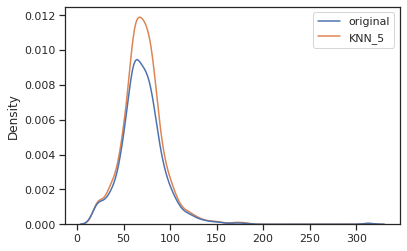

In [152]:
LotFrontage_df = pd.DataFrame({'original': knnimpute_data['LotFrontage'].values})
LotFrontage_df['KNN_5'] = knnimpute_data_imputed['LotFrontage']
sns.kdeplot(data=LotFrontage_df)

<AxesSubplot:ylabel='Density'>

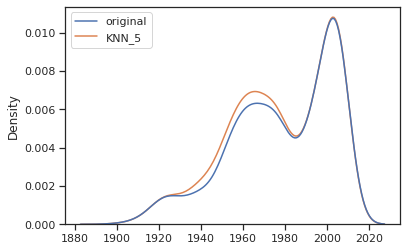

In [153]:
GarageYrBlt_df = pd.DataFrame({'original': knnimpute_data['GarageYrBlt'].values})
GarageYrBlt_df['KNN_5'] = knnimpute_data_imputed['GarageYrBlt']
sns.kdeplot(data=GarageYrBlt_df)

##### Подбор гиперпараметров

Так как для импьютации используется модель KNN, то возникает необходимость подбора гиперпараметров. В этом случае необходимо создать полный пайплайн машинного обучения и оптимизировать параметры всего пайплайна.

In [154]:
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

In [155]:
param_grid = {
    'imputer__n_neighbors': [3,5,10],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

In [156]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

In [157]:
grid_search.fit(knnimpute_data, data['SalePrice'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        KNNImputer(weights='distance')),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Lasso(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'imputer__add_indicator': [True, False],
                         'imputer__n_neighbors': [3, 5, 10],
                         'imputer__weights': ['uniform', 'distance'],
                         'regressor__alpha': [10, 100, 200]},
             scoring='r2')

In [158]:
grid_search.best_params_

{'imputer__add_indicator': True,
 'imputer__n_neighbors': 3,
 'imputer__weights': 'uniform',
 'regressor__alpha': 10}

In [161]:
knnimputer2 = KNNImputer(
    n_neighbors=grid_search.best_params_['imputer__n_neighbors'], 
    weights=grid_search.best_params_['imputer__weights'], 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_data_imputed_temp2 = knnimputer2.fit_transform(knnimpute_data)
knnimpute_data_imputed2 = pd.DataFrame(knnimpute_hdata_imputed_temp2, columns=knnimpute_data.columns)
knnimpute_data_imputed2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


<AxesSubplot:ylabel='Density'>

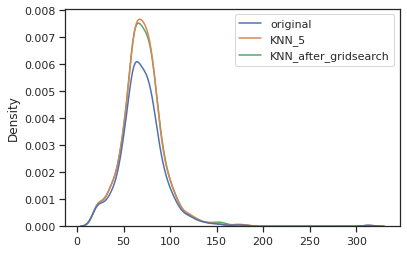

In [162]:
LotFrontage_df['KNN_after_gridsearch'] = knnimpute_data_imputed2['LotFrontage']
sns.kdeplot(data=LotFrontage_df)

<AxesSubplot:ylabel='Density'>

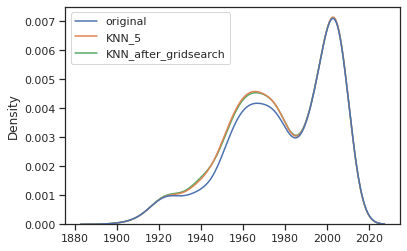

In [163]:
GarageYrBlt_df['KNN_after_gridsearch'] = knnimpute_data_imputed2['GarageYrBlt']
sns.kdeplot(data=GarageYrBlt_df)

#### Метод MICE (multivariate Imputation of Chained Equations)

Описание метода и его реализация в пакете statsmodels.

**Основные шаги метода:**

1. Используем произвольную импьютацию для всех колонок (например, для числовых колонок - средним значением).
2. Для первой колонки подставляем обратно пустые значения.
3. Пропущенные значения в первой колонке предсказываются с помощью модели машинного обучения на основе остальных значений.
4. Предсказанные значения подставляются в первую колонку.
5. Действия выше выполняются в цикле для всех колонок.
6. Действия выше выполняются заданное количество раз. Предполагается что на каждой итерации мы постепенно уточняем значения, соответствующие пропускам.

Рассмотрим реализацию MissForest с использованием IterativeImputer.

In [164]:
imputer_missForest = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

In [165]:
%%time
missForest_data_imputed_temp = imputer_missForest.fit_transform(knnimpute_data)

CPU times: user 4.15 s, sys: 0 ns, total: 4.15 s
Wall time: 4.28 s


In [166]:
missForest_data_imputed = pd.DataFrame(missForest_data_imputed_temp, columns=knnimpute_data.columns)
missForest_data_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


<AxesSubplot:ylabel='Density'>

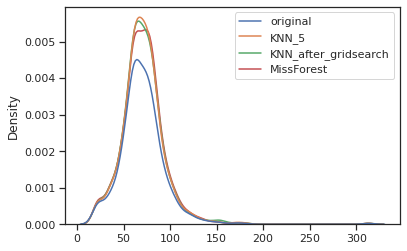

In [167]:
LotFrontage_df['MissForest'] = missForest_data_imputed['LotFrontage']
sns.kdeplot(data=LotFrontage_df)

<AxesSubplot:ylabel='Density'>

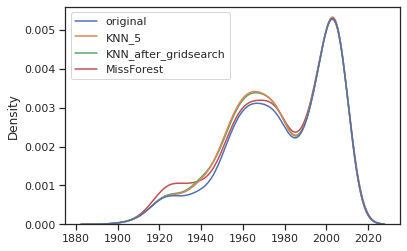

In [168]:
GarageYrBlt_df['MissForest'] = missForest_data_imputed['GarageYrBlt']
sns.kdeplot(data=GarageYrBlt_df)

Методы KNNImputer и MissForest также реализованы в библиотеке missingpy.

## Кодирование категориальных признаков

### Загрузка данных

In [169]:
data_loaded = pd.read_csv('data/titanic.csv', sep=",")

In [170]:
# размер набора данных
data_loaded.shape

(891, 12)

In [171]:
data_loaded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('PassengerId', ('int64', 0)),
 ('Survived', ('int64', 0)),
 ('Pclass', ('int64', 0)),
 ('Name', ('object', 0)),
 ('Sex', ('object', 0)),
 ('Age', ('float64', 177)),
 ('SibSp', ('int64', 0)),
 ('Parch', ('int64', 0)),
 ('Ticket', ('object', 0)),
 ('Fare', ('float64', 0)),
 ('Cabin', ('object', 687)),
 ('Embarked', ('object', 2))]

In [173]:
# Используем только некоторые признаки
cols_filter = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
        'Sex', 'Cabin', 'Embarked', 'Survived']
data = data_loaded[cols_filter]
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked,Survived
0,3,22.0,1,0,7.2500,male,NaN,S,0
1,1,38.0,1,0,71.2833,female,C85,C,1
2,3,26.0,0,0,7.9250,female,NaN,S,1
3,1,35.0,1,0,53.1000,female,C123,S,1
4,3,35.0,0,0,8.0500,male,NaN,S,0


In [174]:
# Заполним пропуски
data.dropna(subset=['Fare', 'Embarked'], inplace=True)

/tmp/ipykernel_11413/1775296338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Fare', 'Embarked'], inplace=True)


In [175]:
# От каюты оставляет только первую букву 
# и убираем каюты типа Т так как их мало
data['Cabin'] = data['Cabin'].astype(str).str[0]
data = data[data['Cabin'] != 'T']

/tmp/ipykernel_11413/1396300600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'] = data['Cabin'].astype(str).str[0]


In [176]:
# Заполним пропуски возраста средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'Age', data['Age'].mean())

/tmp/ipykernel_11413/2056891666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable].fillna(value, inplace=True)


In [177]:
# Убедимся что нет пустых значений
data.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Cabin       0
Embarked    0
Survived    0
dtype: int64

### Кодирование категорий целочисленными значениями - label encoding

Label Encoding (LE), который также называют integer encoding, предполагает, что значения категорий заменяются целыми числами в случайном порядке.

**Преимущества:**
- Простота реализации.
- Не расширяется признаковое пространство (не появляется дополнительных колонок).
**Недостатки:**
- Не использует информацию о распределении значений категорий.
- Не подходит для линейных моделей, так как создает фиктивное отношение порядка между значениями.

В scikit-learn для такого кодирования используется два класса :

- LabelEncoder - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- OrdinalEncoder - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

#### Использование LabelEncoder

In [178]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Cabin'])
data['Cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [179]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [180]:
le.inverse_transform([0, 1, 2, 3])

array(['A', 'B', 'C', 'D'], dtype=object)

Для целочисленного кодирования также можно использовать метод ordinal библиотеки Category Encoders. Для того чтобы учесть возможное отношение порядка между значениями категорий, в качестве параметра mapping можно передавать словарь соответствий между значениями категорий и кодирующими их числами.

In [182]:
data

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked,Survived
0,3,22.000000,1,0,7.2500,male,n,S,0
1,1,38.000000,1,0,71.2833,female,C,C,1
2,3,26.000000,0,0,7.9250,female,n,S,1
3,1,35.000000,1,0,53.1000,female,C,S,1
4,3,35.000000,0,0,8.0500,male,n,S,0
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,male,n,S,0
887,1,19.000000,0,0,30.0000,female,B,S,1
888,3,29.620492,1,2,23.4500,female,n,S,0
889,1,26.000000,0,0,30.0000,male,C,C,1


#### Использование OrdinalEncoder

In [187]:
from sklearn.preprocessing import OrdinalEncoder

data_oe = data[['Sex', 'Cabin', 'Embarked']]
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe)
print(np.unique(cat_enc_oe[:, 0]))
print(np.unique(cat_enc_oe[:, 1]))
print(np.unique(cat_enc_oe[:, 2]))

[0. 1.]
[0. 1. 2. 3. 4. 5. 6. 7.]
[0. 1. 2.]


In [190]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['female', 'male'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'n'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [189]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['male', 'n', 'S'],
       ['female', 'C', 'C'],
       ['female', 'n', 'S'],
       ...,
       ['female', 'n', 'S'],
       ['male', 'C', 'C'],
       ['male', 'n', 'Q']], dtype=object)

#### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д.

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться функцией map для отдельных объектов Series.

In [61]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [62]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [63]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [65]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


### Кодирование категорий наборами бинарных значений - one-hot encoding

One-hot encoding предполагает, что значение категории заменяется на отдельную колонку, которая содержит бинарные значения.

**Преимущества:**
- Простота реализации.
- Подходит для любых моделей, так как НЕ создает фиктивное отношение порядка между значениями.
**Недостатки:**
- Расширяется признаковое пространство.

#### Использование библиотеки scikit-learn

In [192]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Cabin']])
cat_enc_ohe

<888x8 sparse matrix of type '<class 'numpy.float64'>'
	with 888 stored elements in Compressed Sparse Row format>

In [193]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.]])

#### Pandas get_dummies - быстрый вариант one-hot кодирования

Преимущество в том, что возвращается Pandas DataFrame.

In [194]:
pd.get_dummies(data[['Cabin']]).head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n
0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [195]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['Cabin']], dummy_na=True).head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Cabin_nan
0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


#### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [197]:
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

ce_OneHotEncoder1 = ce_OneHotEncoder()
data_OHE = ce_OneHotEncoder1.fit_transform(data[data.columns.difference(['Survived'])])
data_OHE

,Age,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Embarked_1,Embarked_2,Embarked_3,Fare,Parch,Pclass,Sex_1,Sex_2,SibSp
0,22.000000,1,0,0,0,0,0,0,0,1,0,0,7.2500,0,3,1,0,1
1,38.000000,0,1,0,0,0,0,0,0,0,1,0,71.2833,0,1,0,1,1
2,26.000000,1,0,0,0,0,0,0,0,1,0,0,7.9250,0,3,0,1,0
3,35.000000,0,1,0,0,0,0,0,0,1,0,0,53.1000,0,1,0,1,1
4,35.000000,1,0,0,0,0,0,0,0,1,0,0,8.0500,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,1,0,0,0,0,0,0,0,1,0,0,13.0000,0,2,1,0,0
887,19.000000,0,0,0,0,0,0,1,0,1,0,0,30.0000,0,1,0,1,0
888,29.620492,1,0,0,0,0,0,0,0,1,0,0,23.4500,2,3,0,1,1
889,26.000000,0,1,0,0,0,0,0,0,0,1,0,30.0000,0,1,1,0,0


### Count (frequency) encoding

![Count (frequency) encoding](img/count_frequency_encoding.png)

Count encoding предполагает что значение категории заменяется на количество раз, которое оно встречается в категории.

В случае frequency encoding вместо количества используется доля (процент) от количества записей.

**Преимущества:**
- Простота реализации.
- Не расширяется признаковое пространство.
**Недостатки:**
- Если два значения встречаются одинаковое количество раз, то они будут заменены на одно и то же количество и становятся неразличимы.

#### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [198]:
from category_encoders.count import CountEncoder as ce_CountEncoder

ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['Survived'])])
data_COUNT_ENC

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.000000,687,643,7.2500,0,3,576,1
1,38.000000,59,168,71.2833,0,1,312,1
2,26.000000,687,643,7.9250,0,3,312,0
3,35.000000,59,643,53.1000,0,1,312,1
4,35.000000,687,643,8.0500,0,3,576,0
...,...,...,...,...,...,...,...,...
886,27.000000,687,643,13.0000,0,2,576,0
887,19.000000,45,643,30.0000,0,1,312,0
888,29.620492,687,643,23.4500,2,3,312,1
889,26.000000,59,168,30.0000,0,1,576,0


In [199]:
data['Cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [200]:
data_COUNT_ENC['Cabin'].unique()

array([687,  59,  32,   4,  33,  15,  45,  13])

In [202]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['Survived'])])
data_FREQ_ENC

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.000000,0.773649,0.724099,7.2500,0,3,0.648649,1
1,38.000000,0.066441,0.189189,71.2833,0,1,0.351351,1
2,26.000000,0.773649,0.724099,7.9250,0,3,0.351351,0
3,35.000000,0.066441,0.724099,53.1000,0,1,0.351351,1
4,35.000000,0.773649,0.724099,8.0500,0,3,0.648649,0
...,...,...,...,...,...,...,...,...
886,27.000000,0.773649,0.724099,13.0000,0,2,0.648649,0
887,19.000000,0.050676,0.724099,30.0000,0,1,0.351351,0
888,29.620492,0.773649,0.724099,23.4500,2,3,0.351351,1
889,26.000000,0.066441,0.189189,30.0000,0,1,0.648649,0


In [203]:
data_FREQ_ENC['Cabin'].unique()

array([0.77364865, 0.06644144, 0.03603604, 0.0045045 , 0.03716216,
       0.01689189, 0.05067568, 0.01463964])

### Target (Mean) encoding

![Target (Mean) encoding](img/target_encoding.png)

Target encoding предполагает что значение категории заменяется на ранг, соответствующий среднему значению целевого признака для этой категории.

В случае Mean encoding в кодируемый признак подставляется усредненное значение целевого признака.

Фактически, ранг зависит от вероятности появления целевого признака, при условии, что кодируемый признак принимает определенное значение.

Кодирование признака управляется значением целевого признака, возникает монотонная зависимость между кодируемым признаком и целевым признаком.

**Преимущества:**
- Наличие монотонной зависимости.
- Не расширяется признаковое пространство.
**Недостатки:**
- Может привести к переобучению.
- Сложность использования с библиотеками кросс-валидации.

#### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [204]:
# На самом деле этот метод реализует Mean encoding
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

ce_TargetEncoder1 = ce_TargetEncoder()
data_MEAN_ENC = ce_TargetEncoder1.fit_transform(data[data.columns.difference(['Survived'])], data['Survived'])
data_MEAN_ENC

/home/roman/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/roman/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.000000,0.299854,0.337481,7.2500,0,3,0.189236,1
1,38.000000,0.593220,0.553571,71.2833,0,1,0.740385,1
2,26.000000,0.299854,0.337481,7.9250,0,3,0.740385,0
3,35.000000,0.593220,0.337481,53.1000,0,1,0.740385,1
4,35.000000,0.299854,0.337481,8.0500,0,3,0.189236,0
...,...,...,...,...,...,...,...,...
886,27.000000,0.299854,0.337481,13.0000,0,2,0.189236,0
887,19.000000,0.733333,0.337481,30.0000,0,1,0.740385,0
888,29.620492,0.299854,0.337481,23.4500,2,3,0.740385,1
889,26.000000,0.593220,0.553571,30.0000,0,1,0.189236,0


In [205]:
# Проверка для поля "Пол"
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [206]:
data_MEAN_ENC['Sex'].unique()

array([0.18923611, 0.74038462])

In [207]:
def check_mean_encoding(field):
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            prob = sum(data_filter['Survived']) / data_filter.shape[0]
            print(s, '-' , prob)
            
check_mean_encoding('Sex')

male - 0.1892361111111111
female - 0.7403846153846154


In [208]:
# Проверка для поля "Каюта"
data_MEAN_ENC['Cabin'].unique()

array([0.29985444, 0.59322034, 0.75      , 0.49444562, 0.75757576,
       0.4666666 , 0.73333333, 0.61538319])

In [209]:
check_mean_encoding('Cabin')

n - 0.29985443959243085
C - 0.5932203389830508
E - 0.75
G - 0.5
D - 0.7575757575757576
A - 0.4666666666666667
B - 0.7333333333333333
F - 0.6153846153846154


### Weight of evidence (WoE) encoding

$$
WoE = ln(\frac{Пропорция\ хороших\ событий}{Пропорция\ плохих\ событий})
$$

$$
Пропорция\ хороших\ (плохих)\ событий = \frac{Количество\ хороших\ (плохих)\ событий\ для\ заданного\ значения\ категории}{Общее\ количество\ хороших\ (плохих)\ событий})
$$

Кодирование признака управляется значением целевого признака, возникает монотонная зависимость между кодируемым признаком и целевым признаком.

**Преимущества:**
- Наличие монотонной зависимости.
- Хорошо подходит для логистической регресии.
**Недостатки:**
- Может привести к переобучению.

#### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [210]:
from category_encoders.woe import WOEEncoder as ce_WOEEncoder

ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(data[data.columns.difference(['Survived'])], data['Survived'])
data_WOE_ENC

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.000000,-0.370118,-0.197181,7.2500,0,3,-0.972880,1
1,38.000000,0.839751,0.687669,71.2833,0,1,1.515126,1
2,26.000000,-0.370118,-0.197181,7.9250,0,3,1.515126,0
3,35.000000,0.839751,-0.197181,53.1000,0,1,1.515126,1
4,35.000000,-0.370118,-0.197181,8.0500,0,3,-0.972880,0
...,...,...,...,...,...,...,...,...
886,27.000000,-0.370118,-0.197181,13.0000,0,2,-0.972880,0
887,19.000000,1.436519,-0.197181,30.0000,0,1,1.515126,0
888,29.620492,-0.370118,-0.197181,23.4500,2,3,1.515126,1
889,26.000000,0.839751,0.687669,30.0000,0,1,-0.972880,0


In [211]:
# Проверка для поля "Пол"
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [212]:
data_WOE_ENC['Sex'].unique()

array([-0.97288039,  1.51512567])

In [214]:
def check_woe_encoding(field):
    data_ones = data[data['Survived'] == 1].shape[0]
    data_zeros = data[data['Survived'] == 0].shape[0]
    
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            
            filter_data_ones = data_filter[data_filter['Survived'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['Survived'] == 0].shape[0]

            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            
            woe = np.log(good/bad)
            print(s, '-' , woe)

check_woe_encoding('Sex')

male - -0.977651706101945
female - 1.5252982251871632


In [215]:
# Проверка для поля "Каюта"
data_WOE_ENC['Cabin'].unique()

array([-0.37011778,  0.83975065,  1.49675879,  0.47510754,  1.5359795 ,
        0.35732451,  1.43651871,  0.88057265])

In [216]:
check_woe_encoding('Cabin')

n - -0.3706614319783718
C - 0.8546239004792764
E - 1.5759419580059182
G - 0.4773296693378085
D - 1.6167639525261734
A - 0.3437982767132859
B - 1.4889305810162885
F - 0.9473332985835441


### Helmert encoding

Используется для упорядоченных категориальных переменных.

Cравнивает каждый уровень категориальной переменной со средним значением последующих уровней.

[Детальное пояснение алгоритма кодирования](https://stats.stackexchange.com/questions/411134/how-to-calculate-helmert-coding).

#### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [217]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['Survived'])], data['Survived'])
data_HELM_ENC

,intercept,Age,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1,Fare,Parch,Pclass,Sex_0,SibSp
0,1,22.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.2500,0,3,-1.0,1
1,1,38.000000,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,71.2833,0,1,1.0,1
2,1,26.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.9250,0,3,1.0,0
3,1,35.000000,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,53.1000,0,1,1.0,1
4,1,35.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0500,0,3,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0000,0,2,-1.0,0
887,1,19.000000,0.0,0.0,0.0,0.0,0.0,6.0,-1.0,-1.0,-1.0,30.0000,0,1,1.0,0
888,1,29.620492,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.4500,2,3,1.0,1
889,1,26.000000,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,30.0000,0,1,-1.0,0


### Обучение моделей с различными вариантами предобработки признаков

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()   

In [219]:
clas_models_dict = {'LogR': LogisticRegression(max_iter=1000), 
                    'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    'Tree':DecisionTreeClassifier(),
                    'GB': GradientBoostingClassifier(),
                    'RF':RandomForestClassifier(n_estimators=50, random_state=1, max_depth=3)}

X_data_dict = {'One-Hot encoding': data_OHE, 
               'Count encoding': data_COUNT_ENC,
               'Frequency encoding': data_FREQ_ENC, 
               'Mean encoding': data_MEAN_ENC,
               'Weight of evidence encoding': data_WOE_ENC,
               'Helmert encoding': data_HELM_ENC}

In [220]:
def test_models(clas_models_dict, X_data_dict, y_data):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, X_data in X_data_dict.items():
    
            X_train, X_test, y_train, y_test = train_test_split(
                X_data, y_data, test_size=0.3, random_state=1)
        
            model.fit(X_train, y_train)
            pred1 = model.predict_proba(X_train)
            pred2 = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, pred2[:, 1])
            logger.add(model_name, data_name, roc_auc)
            
    return logger

In [221]:
%%time
logger = test_models(clas_models_dict, X_data_dict, data['Survived'])

/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be 

CPU times: user 3.71 s, sys: 46.2 ms, total: 3.75 s
Wall time: 3.55 s


/tmp/ipykernel_11413/3784991673.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


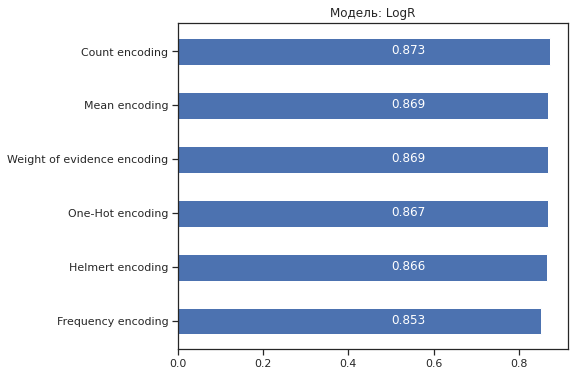

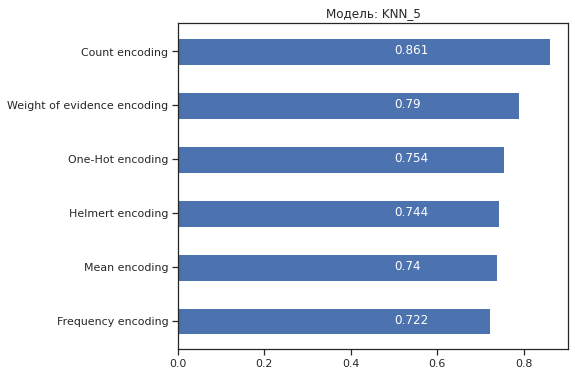

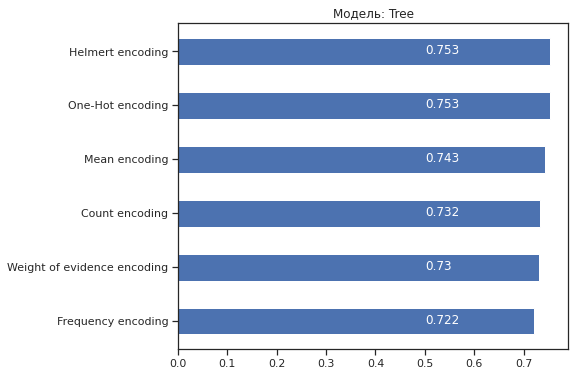

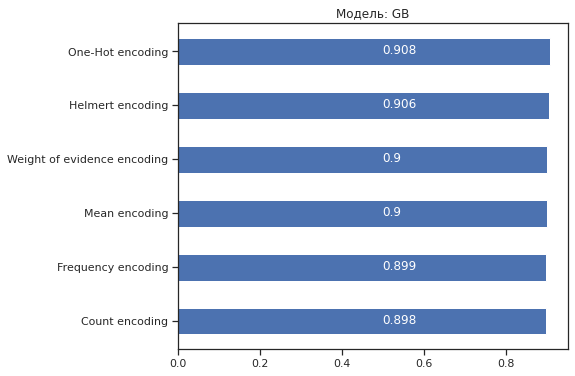

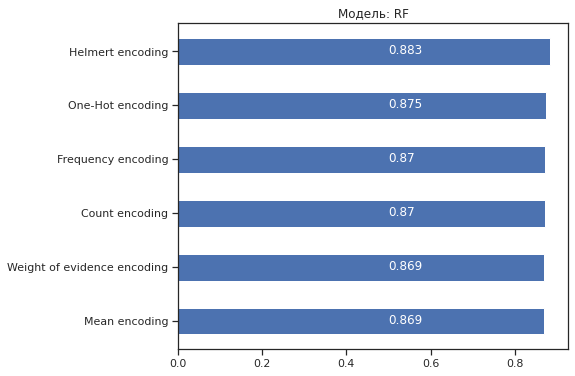

In [222]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))

## Нормализация числовых признаков

## Обработка выбросов

## Масштабирование признаков

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:

- MinMax масштабирование:
$$x_{новый} = \frac{x_{старый}−min(X)}{max(X)−min(X)}$$
В этом случае значения лежат в диапазоне от 0 до 1.


- Масштабирование данных на основе Z-оценки:
$$x_{новый} = \frac{x_{старый}−AVG(X)}{σ(X)}$$
В этом случае большинство значений попадает в диапазон от -3 до 3.

где X - матрица объект-признак, AVG(X) - среднее значение, σ - среднеквадратичное отклонение.

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

In [77]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

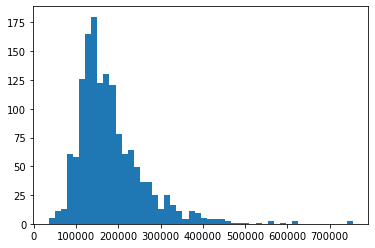

In [78]:
plt.hist(data['SalePrice'], 50)
plt.show()

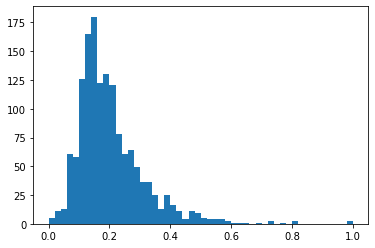

In [79]:
plt.hist(sc1_data, 50)
plt.show()

#### Масштабирование данных на основе Z-оценки - StandardScaler

In [80]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['SalePrice']])

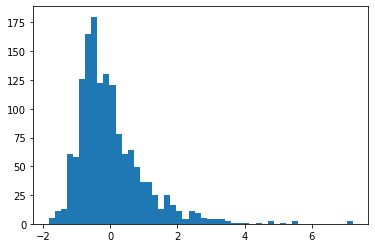

In [81]:
plt.hist(sc2_data, 50)
plt.show()

## Отбор признаков (Feature selection)

# Предварительная обработка данных

## Поиск неявных дубликатов

Как упоминалось ранее, для «gender» 49 различных значений, и было подозрение, что некоторые из этих значений не следует рассматривать как разные категории. В конечном итоге для простоты мы разделим данные на 3 категории: мужчина, женщина и другие (сюда вошли те категории, которые можно однозначно исключить из предыдущих двух, для примера - трансгендер).

Если бы требовалось создать механизм предварительной обработки, который мог бы очищать входящие данные, требовалось бы воспользоваться более умным подходом. Но так как наша задача — это работа с уже имеющемся датасетом, то мы просто используем этот подход с заменой определенных типов.

```python
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"] 
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

df['Gender'] = df["Gender"].apply(lambda x: clean_gender(x)) 
```

## Обработка нулевых значений

В любом наборе данных реального мира всегда есть несколько нулевых значений. На самом деле не имеет значения, является ли это регрессией, классификацией или любой другой проблемой, ни одна модель не может обрабатывать эти значения NULL или NaN самостоятельно, поэтому нам нужно вмешаться.

В питоне NULL представлен NaN. Так что не запутайтесь между этими двумя, их можно использовать взаимозаменяемо.

Прежде всего, нам нужно проверить, есть ли у нас нулевые значения в нашем наборе данных или нет. Мы можем сделать это с помощью метода isnull ().

```python
df.isnull()  
```

Есть разные способы решения этой проблемы. Самый простой способ решить эту проблему - удалить строки или столбцы, содержащие нулевые значения.

```python
df.dropna()
```

dropna () принимает различные параметры, такие как:

1. axis - мы можем указать axis = 0, если мы хотим удалить строки, и axis = 1, если мы хотим удалить столбцы.
2. how - если мы укажем how = ‘all’, тогда строки и столбцы будут отброшены только в том случае, если все значения равны NaN. По умолчанию для how задано значение any.
3. thresh - определяет пороговое значение, поэтому, если мы укажем thresh = 5, то строки, имеющие менее 5 реальных значений, будут отброшены.
4. Подмножество - если у нас есть 4 столбца A, B, C и D, то если мы укажем subset = [‘C’], то будут удалены только те строки, которые имеют значение C в виде NaN.
5. На месте - по умолчанию никакие изменения не будут внесены в ваш фрейм данных. Поэтому, если вы хотите, чтобы эти изменения отразились на вашем фрейме данных, вам нужно использовать inplace = True.

Однако это не лучший вариант удаления строк и столбцов из нашего набора данных, так как это может привести к потере ценной информации. Если у вас есть 300K точек данных, то удаление 2–3 строк не сильно повлияет на ваш набор данных, но если у вас есть только 100 точек данных, из которых 20 имеют значения NaN для определенного поля, вы не можете просто отбросить эти строки. В реальных наборах данных может случиться так, что у вас есть большое количество значений NaN для определенного поля.

Например - предположим, что мы собираем данные из опроса, тогда возможно, что может быть необязательное поле, которое, скажем, 20% людей оставит пустым. Итак, когда мы получаем набор данных, мы должны понимать, что оставшиеся 80% данных все еще полезно, поэтому вместо того, чтобы отбрасывать эти значения, нам нужно как-то заменить недостающие 20% -ые значения Мы можем сделать это с помощью **Вменение** или заменить их на отрицательное число которое не встречается в таблице например -1.



### Вменение 

Импутация - это просто процесс подстановки пропущенных значений в нашем наборе данных. Мы можем сделать это, определив нашу собственную настраиваемую функцию, или мы можем просто выполнить импутацию, используяImputerкласс предоставлен sklearn.

```python
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN' ,strategy='mean')
imputer = imputer.fit(df[['C','D']])
df[['C','D']] = imputer.transform(df[['C','D']])
```

Здесь у нас есть два столбца с пропущенными значениями: C и D.

Значения здесь используется возвращаемое пустое представление фрейма данных.
Будут возвращены только значения во фрейме данных, метки осей будут удалены.

## Пропуски

Очень часто случается так, что в наборе данных пропущены те или иные значения. Данные с пропусками чаще всего нельзя просто так взять передать в модель. Самый простой способ избавиться от пропусков в данных — просто удалить строки, в которых есть пропущенные значения. Но бывают случаи, когда такое удаление строк может привести к потере большого количества информации.

Помимо удаления строк существуют иные, более "стойкие" к потере обучающей информации, методы. Прежде чем рассмотреть эти методы, отмечу, что признаки можно поделить на категориальные и численные.

### Пропуски в категориальных признаках

полнить пропуски в категориальных признаках можно следующими способами:
* Заменить пропущенное значение новой категорией "Неизвестно".
* Заменить пропущенное значение наиболее популярным значением.

### Пропуски в численных признаках

Если имеем дело с численными признаками, можно применить следующие подходы:
* Заменить пропущенное значение средним значением.
* Заменить пропущенное значение медианой. Если в данных присутствуют выбросы, этот способ замены пропусков является предпочтительным.

## Выбросы

В данных могут присутствовать значения, являющиеся выбросами. Это, как правило, не ошибки. Однако, своими значениями они "шокируют" модель.

Для того, чтобы определить, является ли значение выбросом, пользуются характеристикой выборки, называемой интерквартильным размахом. Определяется он следующим образом:
$$
IQR=Q_3 - Q_1
$$

где $Q_1$ — первая квартиль — такое значение признака, меньше которого ровно 25% всех значений признаков. $Q_3$ — третья квартиль — значение, меньше которого ровно 75% всех значений признака.



Для того, чтобы понять, является ли значение выбросом, можно воспользоваться эвристикой: выбросы лежат за пределами следующего интервала:

$$[ Q_1 -1.5IQR, Q_3 + 1.5IQR ]$$

Чаще всего от выбросов в обучающей выборке лучше всего избавляться.

## Нормализация

Нормализация — это приведение всех значений признака к новому диапазону. Например, к диапазону [0, 1]. Это полезно, поскольку значения признаков могут изменяться в очень большом диапазоне. Причем, значения разных признаков могут отличаться на несколько порядков. А после нормализации они все будут находиться в узком (и, часто, едином) диапазоне.

Наиболее популярным способом нормализации является нормализация методом минимакса. Для того, чтобы применить этот метод, должно быть известно максимальное и минимальное значение признака. Проблема в том, что эти значения известны не всегда.

$$ x_{new} = \frac{ x_{old} - x_{min}} {x_{max} - x_{min}} $$

Также довольно популярным методом является Z-нормализация. Диапазон новых значений для Z-нормализации выглядит следующим образом:

$$(-3σ[X], 3σ[X]),$$

где $σ[X]$ — среднеквадратическое отклонение признака X.

Выполняется Z-нормализация по формуле ниже.

$$x_{new} = \frac{x_{old} - M[X]} {σ[X]}$$

где M[X] — математическое ожидание признака X.

Отмечу, что в случае применения Z-нормализации к нескольким признакам, диапазон значений для них будет разным.

## One-hot encoding

Это способ предварительной обработки категориальных признаков. Многие модели плохо работают с категориальными признаками как таковыми. Дело в том, что слово "Российская Федерация" нельзя просто взять и умножить на какое-нибудь число. Но многие модели работают именно так: берется коэффициент и на него умножается значение признака. Аналогичная операция выполняется с остальными признаками. Все результаты суммируются. На основе значения суммы делается вывод о принадлежности объекта к тому или иному классу (такие модели называются линейными).

Однако, как поступать с признаками, значения которых нельзя выразить численно? Можно заменить их значения численным идентификатором. Например, вместо значения "Российская Федерация" использовать значение 1, а вместо "Великобритания" — 2. Тогда линейная модель будет работать. Но, если поступить таким образом, будет утеряно свойство категориальности признака. Иными словами, модель будет пытаться сравнивать идентификаторы признаков между собой. Но они не сравнимы по значению.

Чтобы бороться с этой проблемой, был придуман способ преобразовать исходный признак в несколько новых, бинарных признаков. Например, можно признак "Страна" превратить в 4 новых бинарных признака следующим образом:

| ID | Имя     | Страна Российская Федерация | Страна_Великобритания |Страна Северная Корея | Страна_Бразилия |
| -- |  ------ | --------------------------- | --------------------- | -------------------- | --------------- |
| 1  | Иван    | 1                           | 0                     | 0                    | 0               |
| 2  | Майкл   | 0                           | 1                     | 0                    | 0               |
| 3  | Ким     | 0                           | 0                     | 1                    | 0               |
| 4  | Олег    | 1                           | 0                     | 0                    | 0               |
| 5  | Педро   | 0                           | 0                     | 0                    | 1               |
| 6  | Валерий | 1                           | 0                     | 0                    | 0               |

Для каждого из этих признаков линейная модель будет использовать независимый коэффициент и, таким образом, не будет сравнивать категориальные значения одного и того же признака между собой.

One-Hot Encoding - довольно крутой и аккуратный хак, но с ним связана только одна проблема: Мультиколлинеарность. Поскольку вы все, должно быть, предположили, что это довольно тяжелое слово, поэтому его должно быть трудно понять, поэтому позвольте мне подтвердить ваше вновь сформировавшееся убеждение. Мультиколлинеарность - это действительно немного хитрая, но чрезвычайно важная концепция статистики. Здесь хорошо то, что нам не нужно понимать все мельчайшие детали мультиколлинеарности, нам просто нужно сосредоточиться на том, как это повлияет на нашу модель. Итак, давайте углубимся в эту концепцию мультиколлинеарности и как она повлияет на нашу модель.

код:
```python
data = pd.get_dummies(df)
data
```

### Мультиколлинеарность

Мультиколлинеарность возникает в нашем наборе данных, когда у нас есть особенности, которые сильно зависят друг от друга. В этом случае у нас есть особенности -

color_blue, color_green и color_white, которые все зависят друг от друга, и это может повлиять на нашу модель.

* Основное влияние это окажет на то, что это может вызвать Граница решения изменить что может оказать огромное влияние на результат нашей модели.
* В дополнение к этому, если у нас есть мультиколлинеарность в нашем наборе данных, мы не сможем использовать наш весовой вектор для вычисления важности функции.

Чтобы избежать Multicollinearity

Мы можем использовать drop_first = True, чтобы избежать проблемы мультиколлинеарности.

```python
df_cat = pd.get_dummies(df_cat[['color','size','price']],drop_first=True)
```


Здесь drop_first удалит первый столбец цвета. Поэтому здесь color_blue будет удален, и у нас будут только color_green и color_white.

Здесь важно отметить, что мы не теряем никакой информации, потому что если color_green и color_white равны 0, то это означает, что цвет должен быть синим. Таким образом, мы можем вывести всю информацию с помощью только этих 2 столбцов, следовательно, сильная взаимосвязь между этими тремя столбцами нарушена.

## Разбор структурированных данных из JSON

Попробуем «разобрать» json-подобный объект.
Для этого воспользуемся pandas.json_normalize, который разбирает структурированные данные из JSON в табличный формат, а также json.load, который десериализует текст или байткод, содержащий json-документ в python-объекты. Чтобы применить эти методы ко всей серии, воспользуемся DataFrame.apply (метод не сильно быстрый, но нам требуется выполнить эту операцию всего один раз, поэтому, в данном случае, время смело приносим в жертву).

```python
df_train_extracted = pd.io.json.json_normalize(
    df_train['event_data'].apply(json.loads))
```

Проблема заключается в том, что не все json-подобные объекты удалось полностью разобрать, т.к. на самом деле они не отвечают стандарту json. Например, вот эти колонки остались неразобранными:

lower	flowers
0.0	[0, 0, 0, 0, 0]
0.0	[0, 0, 0, 0, 8]
0.0	[8, 8, 8, 7, 8]
shels
[2, 3, 1]
[2, 3, 2, 1]
[2, 3, 2, 3, 2]

Мы видим списки с пропусками, пустые списки, списки неравной длины, списки словарей, а так-же списки с разным числом вложенных вловарей и даже кортежи списков. Все это возникло потому, что так когда-то кому-то было удобно складировать эти данные в базу данных. Теперь это придется разобрать вручную.

## Кодирование данных

На самом деле Pandas группирует и хранит “столбцы” блоками, разбитыми по типам. Иными словами float, int и objects хранятся раздельно, причем оптимизировано, без индексов. С числами все просто — столбцы в блоке объединяются в многомерный массив NumPy. При запросе значения происходит сопоставление индекса с массивом. С объектами немного сложнее. Все это означает, что разные объекты по-разному используют память.

```python
numerics_part.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 66 columns):
event_code                  200000 non-null int64
event_count                 200000 non-null int64
game_time                   196724 non-null float64
total_duration              34617 non-null float64
duration                    67500 non-null float64
...
end_position                4 non-null float64
gate.row                    832 non-null float64
gate.column                 832 non-null float64
dinosaur_weight             1547 non-null float64
dinosaur_count              1550 non-null float64
dtypes: float64(64), int64(2)
memory usage: 100.7 MB
```

Изменим эту ситуацию и вот как: получим минимальное и максимальное значение в серии, затем сравним его с машинными лимитами для типов Numpy, после чего заменим на наименьшее.

```python
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            # последовательно сравниваем от наименьшего инта начиная с np.int8
            # наверх и переопределяем тип для серии
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
            # и т.д.
        else:
            # аналогично для float
```

Мы выполнили самопальный вариант понижающего преобразования, выиграв 74.4Mb.

```python
numerics_part.info(memory_usage='deep', max_cols=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 66 entries, event_code to dinosaur_count
dtypes: float16(61), float32(3), int16(2)
memory usage: 26.3 MB
```

Но у нас все еще есть проблема:

Оказывается, везде в датасете использовано число с плавающей точкой, хотя на самом деле никакой потребности в этом нет - в этих данных все числа целые. Исправим эту ситуацию:

```python
numerics_part.fillna(value=-1, inplace=True)
numerics_part = numerics_part.astype(int)
```

**Переходим к объектам.** Тип object в Pandas хранит строковое представление. Строки хранятся фрагментировано - значение в ячейке по сути является указателем. При этом резервируется много памяти и это для нас плохо.

Pandas предоставляет подтип category, который отображает строковые данные на индекс в int, а это то, что нам нужно, т.к. данные будут храниться не в виде указателя, а в виде словаря, в котором целочисленным значениям сопоставлены уникальным значениям данных. Перегоним наши объекты в «категории»:

```python
# subtype categoty
def object_to_category(part):
    converted_objects_part = pd.DataFrame()
    unconverted_objects_part = pd.DataFrame()
    total = len(part)
    for col in part.columns:
        try:
            unic = len(part[col].unique())
            if (unic / total) < 0.05:
                converted_objects_part.loc[:,col] = part[col].astype('category')
            else:
                converted_objects_part.loc[:,col] = part[col]
        except TypeError:
            # unhashable objects can't be categorised
            unconverted_objects_part.loc[:,col] = part[col]
    return converted_objects_part, unconverted_objects_part
```

Мы отбросим часть объектов, т.к. договорились ранее не работать с нераспакованной частью json

```python
converted_objects_part, unconverted_objects_part = object_to_category(objects_part)
converted_objects_part.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 39 columns):
version                2345 non-null category
description            69717 non-null category
identifier             68610 non-null category
...
crystal_id             2090 non-null category
location               1180 non-null category
gate.side              832 non-null category
dtypes: category(39)
memory usage: 7.9 MB
```

Временную метку оптимизируем с помощью функции pandas pd.to_datetime. Параметр format позволяет задать тип представления временной отметки. Дефолтный вот такой: “%d/%m/%Y”. Теперь метка будет выглядеть так:

```python
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train['timestamp']

0        2019-09-06 17:53:46.937000+00:00
1        2019-09-06 17:54:17.519000+00:00
2        2019-09-06 17:54:56.302000+00:00
...
199997   2019-08-02 00:06:37.107000+00:00
199998   2019-08-02 00:06:38.480000+00:00
199999   2019-08-02 00:06:40.684000+00:00
Name: timestamp, Length: 200000, dtype: datetime64[ns, UTC]
```